In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statistics
#!pip install scikit-learn -U

In [2]:
#!pip install -U scikit-learn

In [3]:
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
#!pip install --upgrade scikit-learn
#!pip install --upgrade scikit-learn

# Regression Model: The number of net Emigrants(-) or net Immigrants(+).

# Predicting Net Migration

In [5]:
data = pd.read_csv('data.csv')
data.drop("Unnamed: 0", axis=1, inplace=True)
data

,date,country,Continent,gdppc,inflation,poverty,mortality,giniindex,unemployment,netMig,refugee,life_exp,electAccess,totalpop,urbanpop,surface,CO2,precipitation,densitypop,migrationtclass
0,2021,Afghanistan,Asia,1516.305667,6.124620,42.166667,72.889437,37.134597,6.996000,-183672.0,66949.000000,47.684426,52.520487,40099462.0,10551772.0,652860.0,3182.000017,327.00000,61.421227,Emigration
1,2020,Afghanistan,Asia,1968.341002,6.124620,42.166667,58.000000,37.134597,11.710000,166821.0,72278.000000,62.575000,97.699997,38972230.0,10142913.0,652860.0,3182.000017,327.00000,59.694621,Imigration
2,2019,Afghanistan,Asia,2079.921861,2.302373,42.166667,60.100000,37.134597,6.996000,-8082.0,72227.000000,63.565000,97.699997,37769499.0,9727157.0,652860.0,6079.999924,327.00000,57.852371,Emigration
3,2018,Afghanistan,Asia,2060.698973,0.626149,42.166667,62.300000,37.134597,6.996000,-47205.0,72228.000000,63.081000,96.616135,36686784.0,9353296.0,652860.0,6070.000172,327.00000,56.193953,Emigration
4,2017,Afghanistan,Asia,2096.093111,4.975952,42.166667,64.800000,37.134597,11.180000,-47090.0,75927.000000,63.016000,97.699997,35643418.0,8999963.0,652860.0,4780.000210,327.00000,54.595806,Emigration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,1964,Zimbabwe,Africa,2306.782048,77.520200,39.800000,134.200000,45.933333,6.418889,-10064.0,38480.166667,54.994000,37.192777,4310332.0,607412.0,390760.0,12707.000073,657.00000,11.030638,Emigration
6010,1963,Zimbabwe,Africa,2306.782048,77.520200,39.800000,138.600000,45.933333,6.418889,-9369.0,38480.166667,54.549000,37.192777,4177931.0,567279.0,390760.0,12707.000073,657.00000,10.691808,Emigration
6011,1962,Zimbabwe,Africa,2306.782048,77.520200,39.800000,142.900000,45.933333,6.418889,-8931.0,38480.166667,54.071000,37.192777,4049778.0,529792.0,390760.0,12707.000073,657.00000,10.363850,Emigration
6012,1961,Zimbabwe,Africa,2306.782048,77.520200,39.800000,147.000000,45.933333,6.418889,-8582.0,38480.166667,53.619000,37.192777,3925952.0,503346.0,390760.0,12707.000073,657.00000,10.046965,Emigration


In [6]:
#Splitting the dataset with our target netMig = number of emigrants or inmigrants
y=data['netMig']
X=data.drop('netMig', axis=1)

In [7]:
y.value_counts()

 0.0        43
-2997.0     14
-59918.0     7
 40132.0     5
-1095.0      5
            ..
-47170.0     1
-42594.0     1
-37148.0     1
-15423.0     1
-8256.0      1
Name: netMig, Length: 5784, dtype: int64

In [8]:
#splitting in train and test data to focus on train features encoding and scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(4209, 19)

(1805, 19)

(4209,)

(1805,)

In [10]:
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

In [11]:
display(X_train_cat.shape)
display(X_train_num.shape)
display(X_test_cat.shape)
display(X_test_num.shape) 

(4209, 3)

(4209, 16)

(1805, 3)

(1805, 16)

In [12]:
#OneHot encoding with categorical features
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.reset_index(drop = True, inplace = True)
X_train_cat_encode

,country_Algeria,country_Angola,country_Argentina,country_Australia,country_Austria,country_Belgium,country_Bolivia,country_Brazil,country_Cameroon,country_Canada,...,"country_Venezuela, RB",country_Vietnam,country_Zimbabwe,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,migrationtclass_Imigration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
encoder = OneHotEncoder(drop='first').fit(X_test_cat)
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.reset_index(drop = True, inplace = True)
X_test_cat_encode

,country_Algeria,country_Angola,country_Argentina,country_Australia,country_Austria,country_Belgium,country_Bolivia,country_Brazil,country_Cameroon,country_Canada,...,"country_Venezuela, RB",country_Vietnam,country_Zimbabwe,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,migrationtclass_Imigration
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1802,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [14]:
#Scaling with numerical features

transformer = MinMaxScaler().fit(X_train_num)
X_train_num_norm = transformer.transform(X_train_num)
print(X_train_num_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()
X_train_num_scale.reset_index(drop = True, inplace = True)
X_train_num_scale

(4209, 16)


,date,gdppc,inflation,poverty,mortality,giniindex,unemployment,refugee,life_exp,electAccess,totalpop,urbanpop,surface,CO2,precipitation,densitypop
0,0.327869,0.336234,0.001229,0.179384,0.036194,0.236557,0.043264,0.000031,0.940454,1.000000,0.000006,0.000001,0.000009,0.000005,0.270509,0.009707
1,0.262295,0.012152,0.000739,0.508772,0.756611,0.372667,0.217019,0.010008,0.336098,0.522656,0.008786,0.001977,0.038183,0.000283,0.095875,0.001138
2,0.672131,0.387105,0.000565,0.187882,0.009383,0.213152,0.241412,0.216318,0.905084,1.000000,0.058295,0.070109,0.020881,0.079156,0.211645,0.014351
3,0.311475,0.077008,0.000818,0.461750,0.060563,0.652272,0.107259,0.000732,0.816269,0.977659,0.006909,0.007452,0.006427,0.002478,0.408734,0.005503
4,0.721311,0.086845,0.000648,0.157079,0.094399,0.309902,0.552789,0.040496,0.805926,0.989062,0.023007,0.023217,0.139297,0.008344,0.022006,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.147541,0.035570,0.000765,0.480212,0.493034,0.678005,0.171161,0.001176,0.542634,0.770366,0.001664,0.001233,0.007625,0.000358,0.702039,0.001083
4205,0.262295,0.388431,0.000912,0.183686,0.022462,0.150132,0.047274,0.004790,0.854352,1.000000,0.005810,0.007707,0.026167,0.004593,0.188057,0.001097
4206,0.704918,0.200265,0.000725,0.361077,0.053455,0.380952,0.320517,0.100014,0.815771,0.926290,0.012458,0.010578,0.010830,0.004131,0.072597,0.005888
4207,0.049180,0.074498,0.000685,0.250306,0.732442,0.413022,0.461352,0.000238,0.424502,0.972930,0.003056,0.001902,0.009569,0.002129,0.058630,0.001603


In [15]:
X_test_num_norm = transformer.transform(X_test_num)
print(X_test_num_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()
X_test_num_scale.reset_index(drop = True, inplace=True)
X_test_num_scale

(1805, 16)


,date,gdppc,inflation,poverty,mortality,giniindex,unemployment,refugee,life_exp,electAccess,totalpop,urbanpop,surface,CO2,precipitation,densitypop
0,0.852459,0.428689,0.000601,0.164015,0.006824,0.154195,0.234163,5.274536e-03,0.936129,1.000000,0.007852,0.012293,0.001785,0.008884,0.257271,0.022665
1,0.180328,0.033364,0.000536,0.561812,0.438158,0.319728,0.460493,1.437214e-02,0.472002,0.348416,0.008250,0.002272,0.146553,0.001022,0.071976,0.000240
2,1.000000,0.112531,0.006988,0.335373,0.201847,0.251701,0.268200,3.182583e-01,0.761824,0.994900,0.003948,0.005640,0.000611,0.001685,0.199541,0.033366
3,0.967213,0.016274,0.000602,0.241126,0.123401,0.498866,0.094233,3.256646e-01,0.673495,0.409849,0.030398,0.011847,0.014127,0.000533,0.360626,0.011052
4,0.639344,0.038433,0.010917,0.388005,0.590560,0.634165,0.397534,3.129315e-03,0.407682,0.347904,0.011225,0.008786,0.072914,0.001631,0.307862,0.000744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.786885,0.365009,0.001002,0.320047,0.028718,0.372667,0.127009,4.791112e-07,0.848958,1.000000,0.001865,0.002221,0.018101,0.003844,0.033179,0.000484
1801,0.819672,0.296534,0.000543,0.109088,0.004265,0.133787,0.225969,5.794850e-04,0.891422,1.000000,0.007404,0.008687,0.004613,0.010470,0.204507,0.008242
1802,0.163934,0.176651,0.004805,0.397797,0.198465,0.569374,0.147810,8.383249e-03,0.712722,0.967457,0.016870,0.021298,0.162613,0.013604,0.177814,0.000485
1803,0.885246,0.029015,0.000701,0.466340,0.143588,0.524943,0.116609,2.275299e-03,0.692640,0.397287,0.005981,0.001241,0.027069,0.000536,0.969583,0.001091


In [16]:
#Concating numerical and categorical for train and test

X_train = pd.concat([X_train_num_scale,X_train_cat_encode], axis=1)
X_train.index
y_train.reset_index(drop = True, inplace = True)

In [17]:
X_test = pd.concat([X_test_num_scale,X_test_cat_encode], axis=1)
X_test
y_test.reset_index(drop = True, inplace = True)

In [18]:
#making full df for training set for feature selection
data = pd.concat([X_train,y_train],axis = 1)
data.head(10)

,date,gdppc,inflation,poverty,mortality,giniindex,unemployment,refugee,life_exp,electAccess,...,country_Vietnam,country_Zimbabwe,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,migrationtclass_Imigration,netMig
0,0.327869,0.336234,0.001229,0.179384,0.036194,0.236557,0.043264,0.000031,0.940454,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,267.0
1,0.262295,0.012152,0.000739,0.508772,0.756611,0.372667,0.217019,0.010008,0.336098,0.522656,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-85430.0
2,0.672131,0.387105,0.000565,0.187882,0.009383,0.213152,0.241412,0.216318,0.905084,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,48500.0
3,0.311475,0.077008,0.000818,0.461750,0.060563,0.652272,0.107259,0.000732,0.816269,0.977659,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-42543.0
4,0.721311,0.086845,0.000648,0.157079,0.094399,0.309902,0.552789,0.040496,0.805926,0.989062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-38621.0
5,0.475410,0.110710,0.001421,0.320047,0.166904,0.482993,0.360767,0.682732,0.714670,0.992147,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59563.0
6,0.245902,0.026315,0.000922,0.466340,0.340916,0.524943,0.116609,0.001880,0.553430,0.264411,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-23563.0
7,0.852459,0.298373,0.000620,0.109088,0.003696,0.122449,0.216514,0.000665,0.901254,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10308.0
8,0.721311,0.200265,0.003495,1.000000,0.413421,0.555556,0.379452,0.061686,0.491193,0.031609,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,110187.0
9,0.918033,0.362528,0.000477,0.241126,0.004265,0.328798,0.364954,0.035300,0.979289,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49591.0


In [19]:
#using variancethreshold to drop some columns with very low variance.

from sklearn.feature_selection import VarianceThreshold
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train)
temp = sel.transform(X_train)
temp = pd.DataFrame(temp)
print(X_train.shape)
print(temp.shape)

(4209, 119)
(4209, 17)


In [20]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
len(var_list)

119

In [21]:
len(X_train.columns)

119

In [22]:
len(list(zip(X_train.columns,var_list)))

119

In [23]:
drop_list = [col[0] for col in zip(X_train.columns,var_list) if col[1] == False]
len(drop_list)

102

In [24]:
#dropping the features with Var_threshold
X_train = X_train.drop(drop_list, axis = 1)
X_train

,date,gdppc,poverty,mortality,giniindex,unemployment,life_exp,electAccess,surface,precipitation,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,migrationtclass_Imigration
0,0.327869,0.336234,0.179384,0.036194,0.236557,0.043264,0.940454,1.000000,0.000009,0.270509,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.262295,0.012152,0.508772,0.756611,0.372667,0.217019,0.336098,0.522656,0.038183,0.095875,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.672131,0.387105,0.187882,0.009383,0.213152,0.241412,0.905084,1.000000,0.020881,0.211645,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.311475,0.077008,0.461750,0.060563,0.652272,0.107259,0.816269,0.977659,0.006427,0.408734,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.721311,0.086845,0.157079,0.094399,0.309902,0.552789,0.805926,0.989062,0.139297,0.022006,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.147541,0.035570,0.480212,0.493034,0.678005,0.171161,0.542634,0.770366,0.007625,0.702039,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4205,0.262295,0.388431,0.183686,0.022462,0.150132,0.047274,0.854352,1.000000,0.026167,0.188057,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4206,0.704918,0.200265,0.361077,0.053455,0.380952,0.320517,0.815771,0.926290,0.010830,0.072597,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4207,0.049180,0.074498,0.250306,0.732442,0.413022,0.461352,0.424502,0.972930,0.009569,0.058630,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_test = X_test.drop(drop_list, axis = 1)
X_test

,date,gdppc,poverty,mortality,giniindex,unemployment,life_exp,electAccess,surface,precipitation,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,migrationtclass_Imigration
0,0.852459,0.428689,0.164015,0.006824,0.154195,0.234163,0.936129,1.000000,0.001785,0.257271,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.180328,0.033364,0.561812,0.438158,0.319728,0.460493,0.472002,0.348416,0.146553,0.071976,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.112531,0.335373,0.201847,0.251701,0.268200,0.761824,0.994900,0.000611,0.199541,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967213,0.016274,0.241126,0.123401,0.498866,0.094233,0.673495,0.409849,0.014127,0.360626,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.639344,0.038433,0.388005,0.590560,0.634165,0.397534,0.407682,0.347904,0.072914,0.307862,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.786885,0.365009,0.320047,0.028718,0.372667,0.127009,0.848958,1.000000,0.018101,0.033179,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1801,0.819672,0.296534,0.109088,0.004265,0.133787,0.225969,0.891422,1.000000,0.004613,0.204507,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1802,0.163934,0.176651,0.397797,0.198465,0.569374,0.147810,0.712722,0.967457,0.162613,0.177814,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1803,0.885246,0.029015,0.466340,0.143588,0.524943,0.116609,0.692640,0.397287,0.027069,0.969583,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
#using K-Best option to drop some columns with very low variance.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print(X_train.shape)

K_best = SelectKBest(chi2, k=16).fit_transform(X_train, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()

(4209, 17)
(4209, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.327869,0.336234,0.179384,0.036194,0.236557,0.043264,1.000000,0.000009,0.270509,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.262295,0.012152,0.508772,0.756611,0.372667,0.217019,0.522656,0.038183,0.095875,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.672131,0.387105,0.187882,0.009383,0.213152,0.241412,1.000000,0.020881,0.211645,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.311475,0.077008,0.461750,0.060563,0.652272,0.107259,0.977659,0.006427,0.408734,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.721311,0.086845,0.157079,0.094399,0.309902,0.552789,0.989062,0.139297,0.022006,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
model = SelectKBest(chi2, k=16).fit(X_train,y_train)
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column_name']= X_train.columns
display(df.shape)
df
df.sort_values(by = ['score'],ascending = False).head(50)

(17, 2)

,score,column_name
13,4071.000000,Continent_North America
14,4030.434615,Continent_Oceania
11,3719.610687,Continent_Central America
15,3699.820000,Continent_South America
12,3095.074299,Continent_Europe
10,2983.424753,Continent_Asia
16,2101.000000,migrationtclass_Imigration
8,1309.431124,surface
3,908.349201,mortality
0,707.172559,date


In [28]:
cols = df.sort_values(by = ['score'],ascending = False).head(17)['column_name']
col_list = list(cols)
col_list

['Continent_North America',
 'Continent_Oceania',
 'Continent_Central America',
 'Continent_South America',
 'Continent_Europe',
 'Continent_Asia',
 'migrationtclass_Imigration',
 'surface',
 'mortality',
 'date',
 'precipitation',
 'gdppc',
 'unemployment',
 'poverty',
 'electAccess',
 'giniindex',
 'life_exp']

In [29]:
X_train_all = X_train[col_list]
X_train_all

,Continent_North America,Continent_Oceania,Continent_Central America,Continent_South America,Continent_Europe,Continent_Asia,migrationtclass_Imigration,surface,mortality,date,precipitation,gdppc,unemployment,poverty,electAccess,giniindex,life_exp
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000009,0.036194,0.327869,0.270509,0.336234,0.043264,0.179384,1.000000,0.236557,0.940454
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.038183,0.756611,0.262295,0.095875,0.012152,0.217019,0.508772,0.522656,0.372667,0.336098
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.020881,0.009383,0.672131,0.211645,0.387105,0.241412,0.187882,1.000000,0.213152,0.905084
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.006427,0.060563,0.311475,0.408734,0.077008,0.107259,0.461750,0.977659,0.652272,0.816269
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139297,0.094399,0.721311,0.022006,0.086845,0.552789,0.157079,0.989062,0.309902,0.805926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.007625,0.493034,0.147541,0.702039,0.035570,0.171161,0.480212,0.770366,0.678005,0.542634
4205,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.026167,0.022462,0.262295,0.188057,0.388431,0.047274,0.183686,1.000000,0.150132,0.854352
4206,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.010830,0.053455,0.704918,0.072597,0.200265,0.320517,0.361077,0.926290,0.380952,0.815771
4207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009569,0.732442,0.049180,0.058630,0.074498,0.461352,0.250306,0.972930,0.413022,0.424502


In [30]:
X_test_all = X_test[col_list]
X_test_all

,Continent_North America,Continent_Oceania,Continent_Central America,Continent_South America,Continent_Europe,Continent_Asia,migrationtclass_Imigration,surface,mortality,date,precipitation,gdppc,unemployment,poverty,electAccess,giniindex,life_exp
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.001785,0.006824,0.852459,0.257271,0.428689,0.234163,0.164015,1.000000,0.154195,0.936129
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146553,0.438158,0.180328,0.071976,0.033364,0.460493,0.561812,0.348416,0.319728,0.472002
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000611,0.201847,1.000000,0.199541,0.112531,0.268200,0.335373,0.994900,0.251701,0.761824
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.014127,0.123401,0.967213,0.360626,0.016274,0.094233,0.241126,0.409849,0.498866,0.673495
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.072914,0.590560,0.639344,0.307862,0.038433,0.397534,0.388005,0.347904,0.634165,0.407682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.018101,0.028718,0.786885,0.033179,0.365009,0.127009,0.320047,1.000000,0.372667,0.848958
1801,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.004613,0.004265,0.819672,0.204507,0.296534,0.225969,0.109088,1.000000,0.133787,0.891422
1802,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.162613,0.198465,0.163934,0.177814,0.176651,0.147810,0.397797,0.967457,0.569374,0.712722
1803,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.027069,0.143588,0.885246,0.969583,0.029015,0.116609,0.466340,0.397287,0.524943,0.692640


In [31]:
coll_data= pd.concat([X_train_all,y_train], axis= 1)
coll_data

,Continent_North America,Continent_Oceania,Continent_Central America,Continent_South America,Continent_Europe,Continent_Asia,migrationtclass_Imigration,surface,mortality,date,precipitation,gdppc,unemployment,poverty,electAccess,giniindex,life_exp,netMig
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000009,0.036194,0.327869,0.270509,0.336234,0.043264,0.179384,1.000000,0.236557,0.940454,267.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.038183,0.756611,0.262295,0.095875,0.012152,0.217019,0.508772,0.522656,0.372667,0.336098,-85430.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.020881,0.009383,0.672131,0.211645,0.387105,0.241412,0.187882,1.000000,0.213152,0.905084,48500.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.006427,0.060563,0.311475,0.408734,0.077008,0.107259,0.461750,0.977659,0.652272,0.816269,-42543.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139297,0.094399,0.721311,0.022006,0.086845,0.552789,0.157079,0.989062,0.309902,0.805926,-38621.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.007625,0.493034,0.147541,0.702039,0.035570,0.171161,0.480212,0.770366,0.678005,0.542634,-4590.0
4205,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.026167,0.022462,0.262295,0.188057,0.388431,0.047274,0.183686,1.000000,0.150132,0.854352,10238.0
4206,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.010830,0.053455,0.704918,0.072597,0.200265,0.320517,0.361077,0.926290,0.380952,0.815771,-17451.0
4207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009569,0.732442,0.049180,0.058630,0.074498,0.461352,0.250306,0.972930,0.413022,0.424502,-65956.0


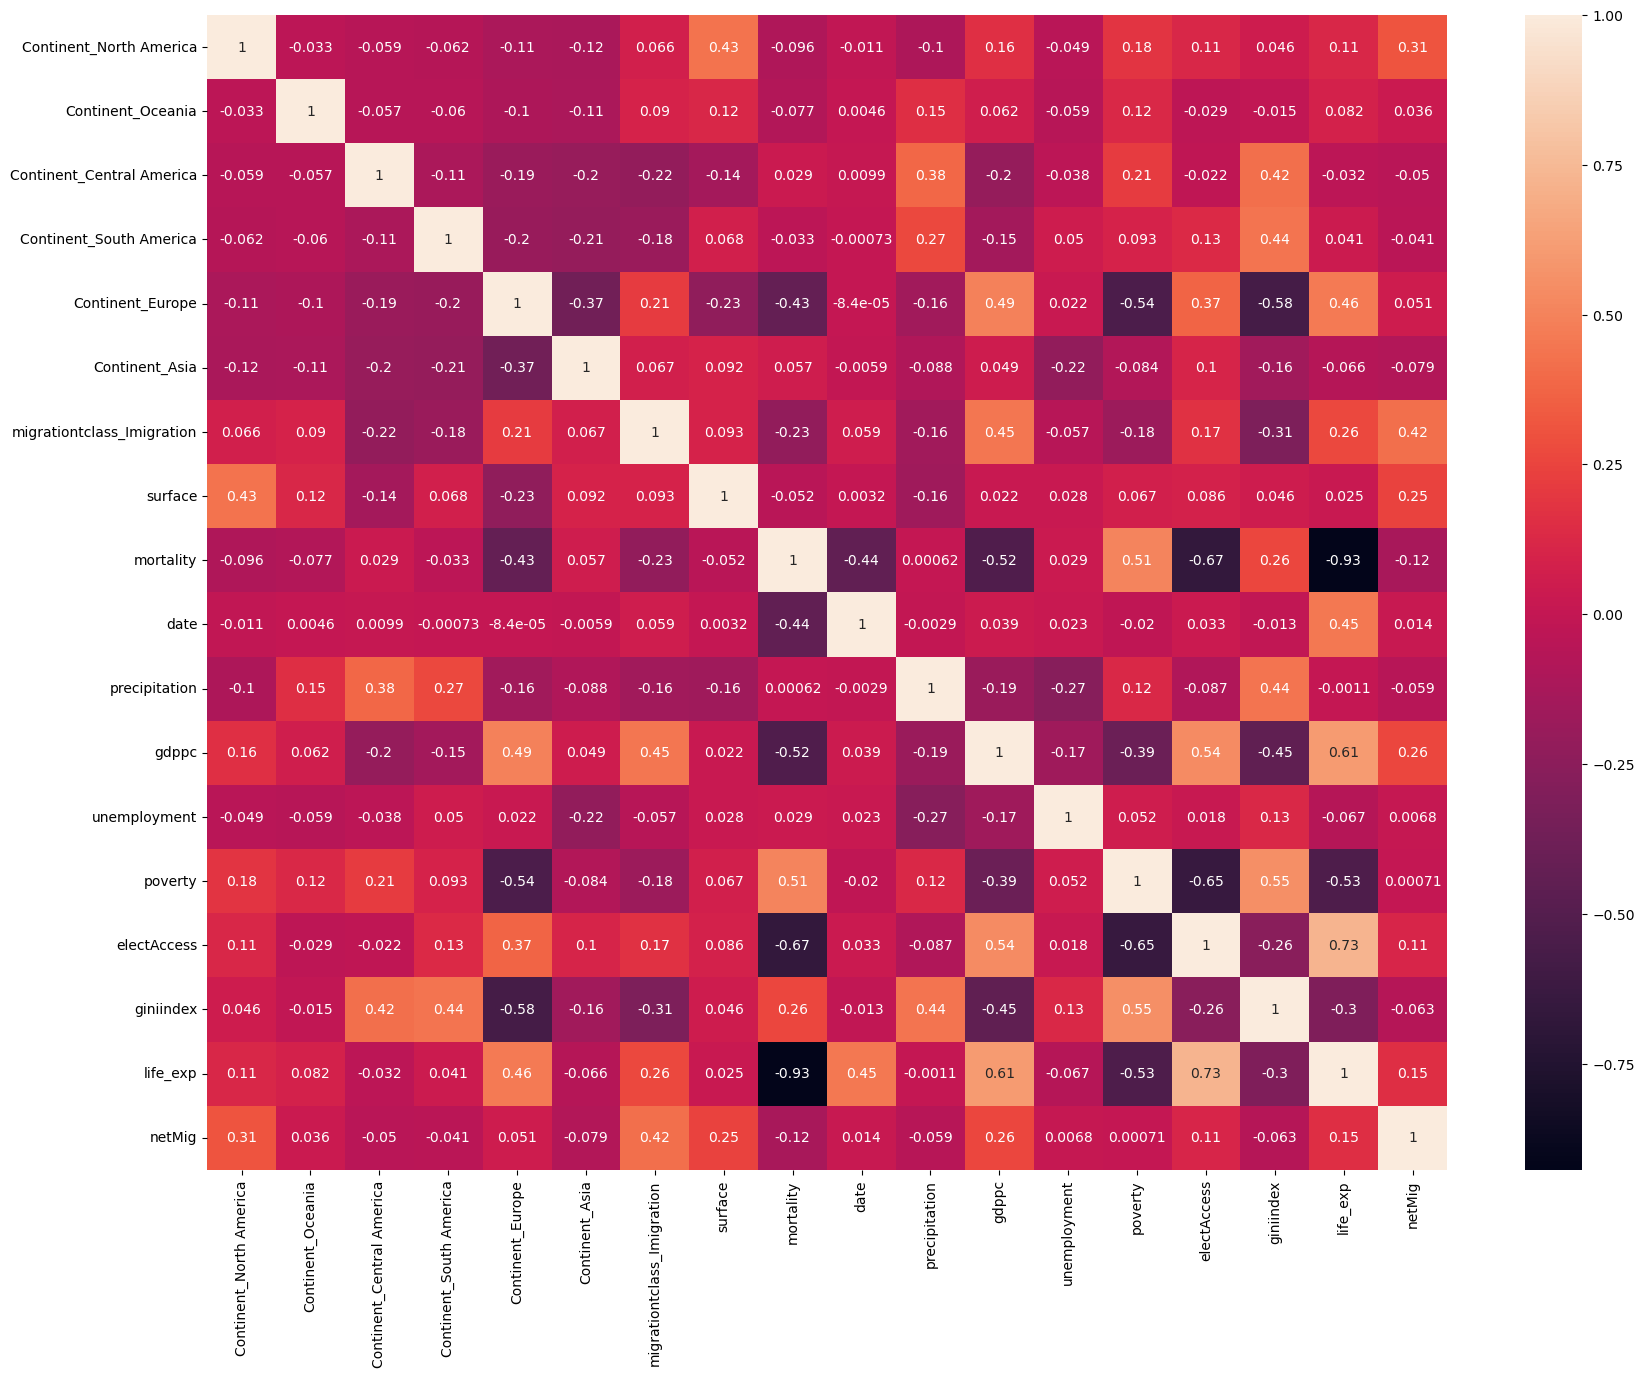

In [32]:
corr_matrix = coll_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

In [33]:
#Cheking columns with our model
col_to_drop = []

In [34]:
X_train = X_train_all.drop(col_to_drop, axis = 1)
X_train.shape
X_test = X_test_all.drop(col_to_drop, axis = 1)
X_test

,Continent_North America,Continent_Oceania,Continent_Central America,Continent_South America,Continent_Europe,Continent_Asia,migrationtclass_Imigration,surface,mortality,date,precipitation,gdppc,unemployment,poverty,electAccess,giniindex,life_exp
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.001785,0.006824,0.852459,0.257271,0.428689,0.234163,0.164015,1.000000,0.154195,0.936129
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146553,0.438158,0.180328,0.071976,0.033364,0.460493,0.561812,0.348416,0.319728,0.472002
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000611,0.201847,1.000000,0.199541,0.112531,0.268200,0.335373,0.994900,0.251701,0.761824
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.014127,0.123401,0.967213,0.360626,0.016274,0.094233,0.241126,0.409849,0.498866,0.673495
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.072914,0.590560,0.639344,0.307862,0.038433,0.397534,0.388005,0.347904,0.634165,0.407682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.018101,0.028718,0.786885,0.033179,0.365009,0.127009,0.320047,1.000000,0.372667,0.848958
1801,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.004613,0.004265,0.819672,0.204507,0.296534,0.225969,0.109088,1.000000,0.133787,0.891422
1802,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.162613,0.198465,0.163934,0.177814,0.176651,0.147810,0.397797,0.967457,0.569374,0.712722
1803,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.027069,0.143588,0.885246,0.969583,0.029015,0.116609,0.466340,0.397287,0.524943,0.692640


In [35]:
#Running regression models with the chosen features.

print("X_train:", X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",y_test.shape)
print("y_test:",y_test.shape)

X_train: (4209, 17)
y_train: (4209,)
X_test: (1805,)
y_test: (1805,)


# Running Regression Models:

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [37]:
def models_automation(models, X_train, y_train,X_test,y_test):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}, RSME {np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))}")

In [38]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train, y_train,X_test,y_test)

LinearRegression: Train -> 0.2826812416919078, Test -> 0.22589611072312232, RSME 174859.36869078205
SGDRegressor: Train -> 0.27979507539739545, Test -> 0.22510614952505636, RSME 174948.56659809
KNeighborsRegressor: Train -> 0.8079933850788819, Test -> 0.6770327662681699, RSME 112945.39099947509


/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train -> 0.007829374383564347, Test -> 0.008695311133485206, RSME 197875.8810346516
DecisionTreeRegressor: Train -> 1.0, Test -> 0.4020545938721375, RSME 153680.9541299163
RandomForestRegressor: Train -> 0.9664857196370196, Test -> 0.688112044877009, RSME 110991.20919195384


# Best model here is RandomForestRegressor & KNeighborsRegressor, RFR has a lower RSME.

In [39]:
#Optimizing parameters for models:

model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(n_neighbors =9), MLPRegressor(solver = 'lbfgs', max_iter = 1500),
              RandomForestRegressor(min_samples_split = 7,
                                    min_samples_leaf = 6,
                                    max_samples = 0.4,
                                    max_depth = 14,
                                    n_jobs = -1)]
models_automation(model_list, X_train, y_train,X_test,y_test)

LinearRegression: Train -> 0.2826812416919078, Test -> 0.22589611072312232, RSME 174859.36869078205
SGDRegressor: Train -> 0.2810769707036319, Test -> 0.22466960270580272, RSME 174997.8394673944
KNeighborsRegressor: Train -> 0.7251303310664052, Test -> 0.6432255788376326, RSME 118709.68059554782


/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor: Train -> 0.7798966381656018, Test -> 0.6328191618996437, RSME 120428.50242109277
RandomForestRegressor: Train -> 0.7267991255580797, Test -> 0.6271158039225071, RSME 121360.19620149786


# Let's run ALL of the data to gain insights:

In [40]:
X.dtypes

date                 int64
country             object
Continent           object
gdppc              float64
inflation          float64
poverty            float64
mortality          float64
giniindex          float64
unemployment       float64
refugee            float64
life_exp           float64
electAccess        float64
totalpop           float64
urbanpop           float64
surface            float64
CO2                float64
precipitation      float64
densitypop         float64
migrationtclass     object
dtype: object

In [41]:
display(X)
display(y)

,date,country,Continent,gdppc,inflation,poverty,mortality,giniindex,unemployment,refugee,life_exp,electAccess,totalpop,urbanpop,surface,CO2,precipitation,densitypop,migrationtclass
0,2021,Afghanistan,Asia,1516.305667,6.124620,42.166667,72.889437,37.134597,6.996000,66949.000000,47.684426,52.520487,40099462.0,10551772.0,652860.0,3182.000017,327.00000,61.421227,Emigration
1,2020,Afghanistan,Asia,1968.341002,6.124620,42.166667,58.000000,37.134597,11.710000,72278.000000,62.575000,97.699997,38972230.0,10142913.0,652860.0,3182.000017,327.00000,59.694621,Imigration
2,2019,Afghanistan,Asia,2079.921861,2.302373,42.166667,60.100000,37.134597,6.996000,72227.000000,63.565000,97.699997,37769499.0,9727157.0,652860.0,6079.999924,327.00000,57.852371,Emigration
3,2018,Afghanistan,Asia,2060.698973,0.626149,42.166667,62.300000,37.134597,6.996000,72228.000000,63.081000,96.616135,36686784.0,9353296.0,652860.0,6070.000172,327.00000,56.193953,Emigration
4,2017,Afghanistan,Asia,2096.093111,4.975952,42.166667,64.800000,37.134597,11.180000,75927.000000,63.016000,97.699997,35643418.0,8999963.0,652860.0,4780.000210,327.00000,54.595806,Emigration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,1964,Zimbabwe,Africa,2306.782048,77.520200,39.800000,134.200000,45.933333,6.418889,38480.166667,54.994000,37.192777,4310332.0,607412.0,390760.0,12707.000073,657.00000,11.030638,Emigration
6010,1963,Zimbabwe,Africa,2306.782048,77.520200,39.800000,138.600000,45.933333,6.418889,38480.166667,54.549000,37.192777,4177931.0,567279.0,390760.0,12707.000073,657.00000,10.691808,Emigration
6011,1962,Zimbabwe,Africa,2306.782048,77.520200,39.800000,142.900000,45.933333,6.418889,38480.166667,54.071000,37.192777,4049778.0,529792.0,390760.0,12707.000073,657.00000,10.363850,Emigration
6012,1961,Zimbabwe,Africa,2306.782048,77.520200,39.800000,147.000000,45.933333,6.418889,38480.166667,53.619000,37.192777,3925952.0,503346.0,390760.0,12707.000073,657.00000,10.046965,Emigration


0      -183672.0
1       166821.0
2        -8082.0
3       -47205.0
4       -47090.0
          ...   
6009    -10064.0
6010     -9369.0
6011     -8931.0
6012     -8582.0
6013     -8256.0
Name: netMig, Length: 6014, dtype: float64

In [42]:
#Scale and encode ALL of the data for model

In [43]:
Xcat = X.select_dtypes(include=object)
Xnum = X.select_dtypes(include=np.number)
Xcat

,country,Continent,migrationtclass
0,Afghanistan,Asia,Emigration
1,Afghanistan,Asia,Imigration
2,Afghanistan,Asia,Emigration
3,Afghanistan,Asia,Emigration
4,Afghanistan,Asia,Emigration
...,...,...,...
6009,Zimbabwe,Africa,Emigration
6010,Zimbabwe,Africa,Emigration
6011,Zimbabwe,Africa,Emigration
6012,Zimbabwe,Africa,Emigration


In [44]:
encoder = OneHotEncoder(drop='first').fit(Xcat)

cols = encoder.get_feature_names_out(input_features=Xcat.columns)

Xcat_encode = pd.DataFrame(encoder.transform(Xcat).toarray(),columns=cols)

Xcat_encode.reset_index(drop = True, inplace = True)
Xcat_encode

,country_Algeria,country_Angola,country_Argentina,country_Australia,country_Austria,country_Belgium,country_Bolivia,country_Brazil,country_Cameroon,country_Canada,...,"country_Venezuela, RB",country_Vietnam,country_Zimbabwe,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,migrationtclass_Imigration
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
transformer = MinMaxScaler().fit(Xnum)
Xnum_norm = transformer.transform(Xnum)
print(Xnum_norm.shape)
Xnum_scale = pd.DataFrame(Xnum_norm, index = Xnum.index, columns=Xnum.columns)
Xnum_scale.head()
Xnum_scale.reset_index(drop = True, inplace = True)

(6014, 16)


In [46]:
X = pd.concat([Xnum_scale,Xcat_encode], axis = 1)

In [47]:
X

,date,gdppc,inflation,poverty,mortality,giniindex,unemployment,refugee,life_exp,electAccess,...,"country_Venezuela, RB",country_Vietnam,country_Zimbabwe,Continent_Asia,Continent_Central America,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,migrationtclass_Imigration
0,1.000000,0.009690,0.000935,0.512353,0.193063,0.372667,0.208965,0.015197,0.488549,0.522656,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.983607,0.013747,0.000935,0.512353,0.152570,0.372667,0.350782,0.016407,0.694765,0.976877,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.967213,0.014748,0.000774,0.512353,0.158281,0.372667,0.208965,0.016395,0.708475,0.976877,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.950820,0.014575,0.000704,0.512353,0.164264,0.372667,0.208965,0.016396,0.701772,0.965980,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.934426,0.014893,0.000887,0.512353,0.171063,0.372667,0.334838,0.017235,0.700872,0.976877,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,0.065574,0.016783,0.003936,0.483597,0.359804,0.572184,0.191603,0.008734,0.589777,0.368556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6010,0.049180,0.016783,0.003936,0.483597,0.371770,0.572184,0.191603,0.008734,0.583615,0.368556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6011,0.032787,0.016783,0.003936,0.483597,0.383465,0.572184,0.191603,0.008734,0.576995,0.368556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6012,0.016393,0.016783,0.003936,0.483597,0.394615,0.572184,0.191603,0.008734,0.570735,0.368556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#keeping the same columns as before
X = X.drop(drop_list, axis = 1)   #dropping
X.shape

(6014, 17)

In [49]:
X = X[col_list]           #columns to keep -- top 25
X.shape

(6014, 17)

In [50]:
X = X.drop(col_to_drop, axis = 1)
X.shape

(6014, 17)

# Re-Running models with all the data

In [51]:
def models_automation(models, X, y):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Results -> {model.score(X, y)}")
        print(f"{model.__class__.__name__}: RSME {np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))}")

In [52]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X, y)

LinearRegression: Results -> 0.2659220156741201
LinearRegression: RSME 174859.36869078205
SGDRegressor: Results -> 0.26436757077615725
SGDRegressor: RSME 174855.6881485898
KNeighborsRegressor: Results -> 0.7650748816533759
KNeighborsRegressor: RSME 112945.39099947509


/Users/matiasgroblunecke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Results -> 0.00908982190935581
MLPRegressor: RSME 197860.41696228512
DecisionTreeRegressor: Results -> 0.5804724787180777
DecisionTreeRegressor: RSME 156618.454126804
RandomForestRegressor: Results -> 0.8264689192132936
RandomForestRegressor: RSME 113475.80555190658


# Random Forest Regressor has the best score and the lowest RSME using all our data.

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [54]:
y_pred = regressor.predict(X_test)

In [55]:
#Checking our predictions:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,56227.0,50554.998
1,-3573.0,-161882.360
2,-115122.0,-97897.887
3,107203.0,98579.673
4,51687.0,53466.522
...,...,...
1800,-2491.0,-15793.087
1801,34805.0,22154.906
1802,38356.0,38668.583
1803,32841.0,34993.595


In [56]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 36088.19708421053
Mean Squared Error: 12513801147.320395
Root Mean Squared Error: 111865.10245523577


In [57]:
#!pip install pydot
#!pip install graphviz

In [58]:
#the OOB score is computed as the number of correctly predicted rows from the out of bag sample.
#this parameter makes Random Forest Regressor use “out-of-bag” samples to estimate the R^2 on unseen data. 
#If you get a value of more than 0.70, it means your model does not overfit (the best possible score is equal to 1)

random_forest_out_of_bag = RandomForestRegressor(oob_score=True)
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_)

0.7512783365612951
